In [127]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import patches


Populating the interactive namespace from numpy and matplotlib


# Read spreadsheet

In [128]:
df = pd.read_excel("../tests/test_data.xlsx")
df.keys()

Index(['id_obj', 'y_px', 'x_px', 'bbox_0_y_px', 'bbox_0_x_px', 'bbox_1_y_px',
       'bbox_1_x_px', 't_frame', 'id_parent', 'intensity mean in channel 0',
       'intensity var in channel 0', 'intensity mean in channel 1',
       'intensity var in channel 1', 'celltrack_version', 'File Name',
       'File Path', 'Datetime', 'platform.system', 'platform.node',
       'platform.processor', 'MicrAnt Version', 'timestamp', 'numpy_version',
       'scipy_version', 'skimage_version', 'x [mm]', 'y [mm]', 't [s]',
       'bbox left [mm]', 'bbox bottom [mm]', 'bbox right [mm]',
       'bbox top [mm]'],
      dtype='object')

## Select data

In [129]:
ts = df.timestamp.unique()[0]
dfs = df[df.timestamp==ts]

# Tracking

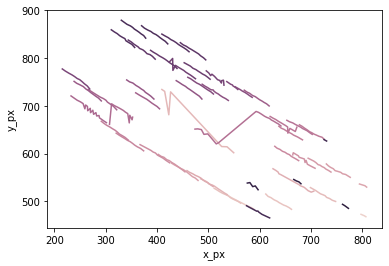

In [130]:


sns.lineplot(data=dfs, x="x_px", y="y_px", hue="id_obj", legend=False)

## Plot with bounding boxes

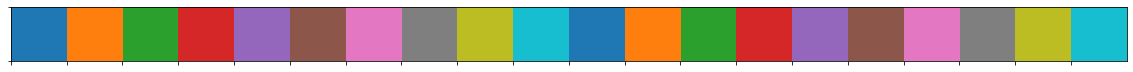

In [131]:
sns.palplot(sns.color_palette(None, 20))

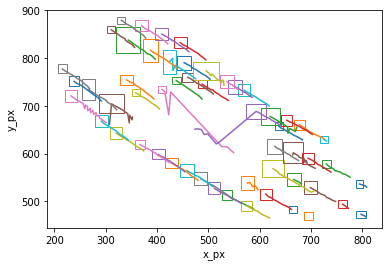

In [132]:
fig = plt.figure()

pal= sns.color_palette(None, len(dfs.id_obj.unique()))

ax = sns.lineplot(data=dfs, x="x_px", y="y_px", hue="id_obj", legend=False, palette=pal)
dflast = dfs.groupby("id_obj").last()


for i in range(len(dflast)):
    dflast.bbox_0_x_px[i]
    dflast.bbox_0_y_px[i]
    rect = patches.Rectangle(
        (dflast.bbox_0_x_px[i],
        dflast.bbox_0_y_px[i]),
        dflast.bbox_1_x_px[i] - dflast.bbox_0_x_px[i],
        dflast.bbox_1_y_px[i] - dflast.bbox_0_y_px[i],
        linewidth=1,edgecolor=pal[i],facecolor='none'
    )
    ax.add_patch(rect)

In [133]:
len(df)

532

In [134]:
len(df.keys())

32

# Intensity evaluation

## In each channel

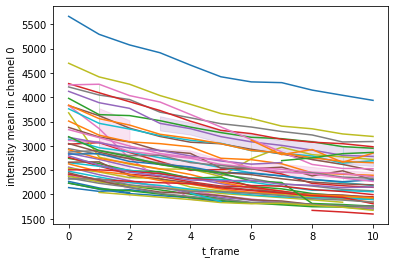

In [135]:
sns.lineplot(data=dfs, x="t_frame", y="intensity mean in channel 0", hue="id_obj", palette=pal, legend=False)

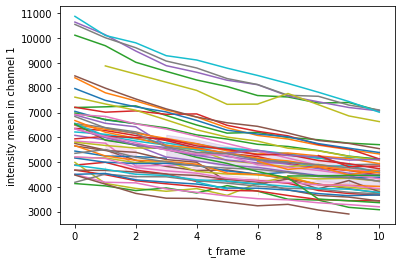

In [136]:

sns.lineplot(data=dfs, x="t_frame", y="intensity mean in channel 1", hue="id_obj", palette=pal, legend=False)

## Relative intensity

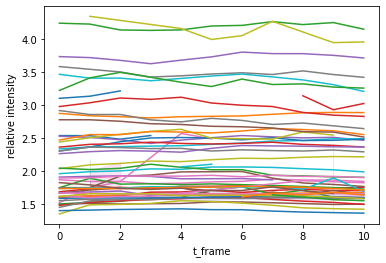

In [137]:
dfs["relative intensity"] = dfs["intensity mean in channel 1"] / dfs["intensity mean in channel 0"] 
sns.lineplot(data=dfs, x="t_frame", y="relative intensity", hue="id_obj", palette=pal, legend=False)

## All channels together

In [138]:
dfsm = pd.melt(dfs.reset_index(), id_vars=['id_obj', "t_frame"],value_vars=['intensity mean in channel 0', 'intensity mean in channel 1'])
dfsm

,id_obj,t_frame,variable,value
0,0,0,intensity mean in channel 0,2268.025879
1,0,1,intensity mean in channel 0,2133.858154
2,0,2,intensity mean in channel 0,2034.653198
3,1,0,intensity mean in channel 0,2130.438965
4,2,0,intensity mean in channel 0,2383.406738
...,...,...,...,...
1059,52,9,intensity mean in channel 1,4465.574219
1060,52,10,intensity mean in channel 1,4460.790527
1061,53,8,intensity mean in channel 1,5263.796387
1062,53,9,intensity mean in channel 1,4811.411621


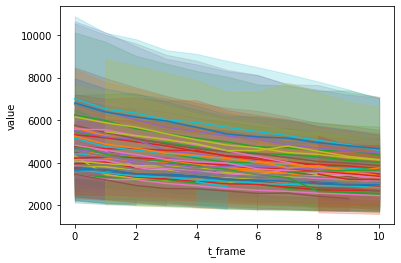

In [139]:
sns.lineplot(data=dfsm, x="t_frame", y="value", hue="id_obj", palette=pal, legend=False)

In [140]:
# g = sns.PairGrid(data=dfsm, x=)
# g = g.map_diag(plt.hist)
# g = g.map_offdiag(plt.scatter)

# Calculate mean of coords

In [141]:
dfsg = dfs.groupby("t_frame").mean()
dfsg["x_px_mean"] = dfsg["x_px"]
dfsg["y_px_mean"] = dfsg["y_px"]
dfsg = dfsg.reset_index()

dfsg_small = dfsg[["t_frame", "x_px_mean", "y_px_mean"]]

dfsm = dfs.merge(dfsg_small, left_on="t_frame", right_on="t_frame")

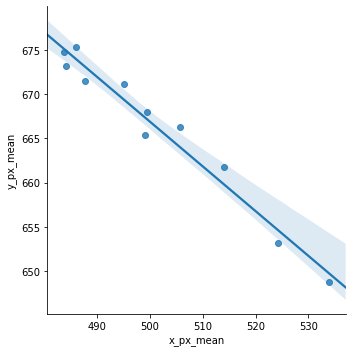

In [166]:
fg = sns.lmplot(data=dfsg, x="x_px_mean", y="y_px_mean")


In [161]:
fg.ax

In [143]:
dfsm.keys()

Index(['id_obj', 'y_px', 'x_px', 'bbox_0_y_px', 'bbox_0_x_px', 'bbox_1_y_px',
       'bbox_1_x_px', 't_frame', 'id_parent', 'intensity mean in channel 0',
       'intensity var in channel 0', 'intensity mean in channel 1',
       'intensity var in channel 1', 'celltrack_version', 'File Name',
       'File Path', 'Datetime', 'platform.system', 'platform.node',
       'platform.processor', 'MicrAnt Version', 'timestamp', 'numpy_version',
       'scipy_version', 'skimage_version', 'x [mm]', 'y [mm]', 't [s]',
       'bbox left [mm]', 'bbox bottom [mm]', 'bbox right [mm]',
       'bbox top [mm]', 'relative intensity', 'x_px_mean', 'y_px_mean'],
      dtype='object')

In [144]:
dfsm

,id_obj,y_px,x_px,bbox_0_y_px,bbox_0_x_px,bbox_1_y_px,bbox_1_x_px,t_frame,id_parent,intensity mean in channel 0,...,x [mm],y [mm],t [s],bbox left [mm],bbox bottom [mm],bbox right [mm],bbox top [mm],relative intensity,x_px_mean,y_px_mean
0,0,468.0,807.0,457,796,479,818,0,NaN,2268.025879,...,0.000222,0.000129,0,0.000126,0.000225,0.000132,0.000219,3.107574,533.9375,648.697917
1,1,469.5,695.0,462,687,477,703,0,NaN,2130.438965,...,0.000191,0.000129,0,0.000127,0.000193,0.000131,0.000189,1.816227,533.9375,648.697917
2,2,483.5,589.0,471,577,496,601,0,NaN,2383.406738,...,0.000162,0.000133,0,0.000130,0.000165,0.000136,0.000159,4.245627,533.9375,648.697917
3,3,483.5,662.0,472,650,495,674,0,NaN,3033.691650,...,0.000182,0.000133,0,0.000130,0.000185,0.000136,0.000179,1.608074,533.9375,648.697917
4,4,496.5,563.0,483,551,510,575,0,NaN,2847.505127,...,0.000155,0.000137,0,0.000133,0.000158,0.000140,0.000152,3.739567,533.9375,648.697917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,47,879.5,330.5,872,323,887,338,10,NaN,1753.523438,...,0.000091,0.000242,10,0.000240,0.000093,0.000244,0.000089,2.648937,483.6875,674.833333
528,48,491.0,574.5,481,563,501,586,10,NaN,1674.614624,...,0.000158,0.000135,10,0.000132,0.000161,0.000138,0.000155,3.961054,483.6875,674.833333
529,51,538.5,576.0,523,563,554,589,10,NaN,2849.116211,...,0.000158,0.000148,10,0.000144,0.000162,0.000152,0.000155,1.642625,483.6875,674.833333
530,52,546.0,666.5,532,653,560,680,10,NaN,2864.930664,...,0.000183,0.000150,10,0.000146,0.000187,0.000154,0.000180,1.557033,483.6875,674.833333


## Dist from actual center

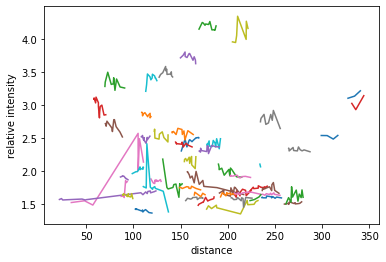

In [148]:
dfsm["distance"] = ((dfsm.y_px-dfsm.y_px_mean)**2 + (dfsm.x_px-dfsm.x_px_mean)**2)**0.5

sns.lineplot(data=dfsm, x="distance", y="relative intensity", hue="id_obj", palette=pal, legend=False)